Survival Analysis, broadly-speaking, is a corner of statistics that deals with answering questions regarding "time to event" for a given population. It has applications in all kinds of contexts, from healthcare, to marketing, to manufacturing, etc.

There's all sorts of nuance and rabbit-holing to be done, learning the ins and outs, but first, it'd help to establish some of the fundamental concepts and their derivations.

## The Data

Obviously, if we're trying to train a model to make predictions on time and events, we need data that informs us of time spent as well as event occurences. Later, we'll explore how to layer in more information than that, but for purposes of this notebook we can assume that our data will be several rows of observations with attributes `(time_event_occurred, did_event_occur)`.

In most other modeling applications, you'd need to take careful consideration of how you select your data-- do you take records that never have an event occur? Do you throw out records that have the event occur right out of the gate? How do you weight records proportional to the information you can gain from them?

The key strength of using survival analysis lies in the fact that all of these questions are managed for you. This image from the documentation for the `lifelines` Python library does a great job highlighting the fact.

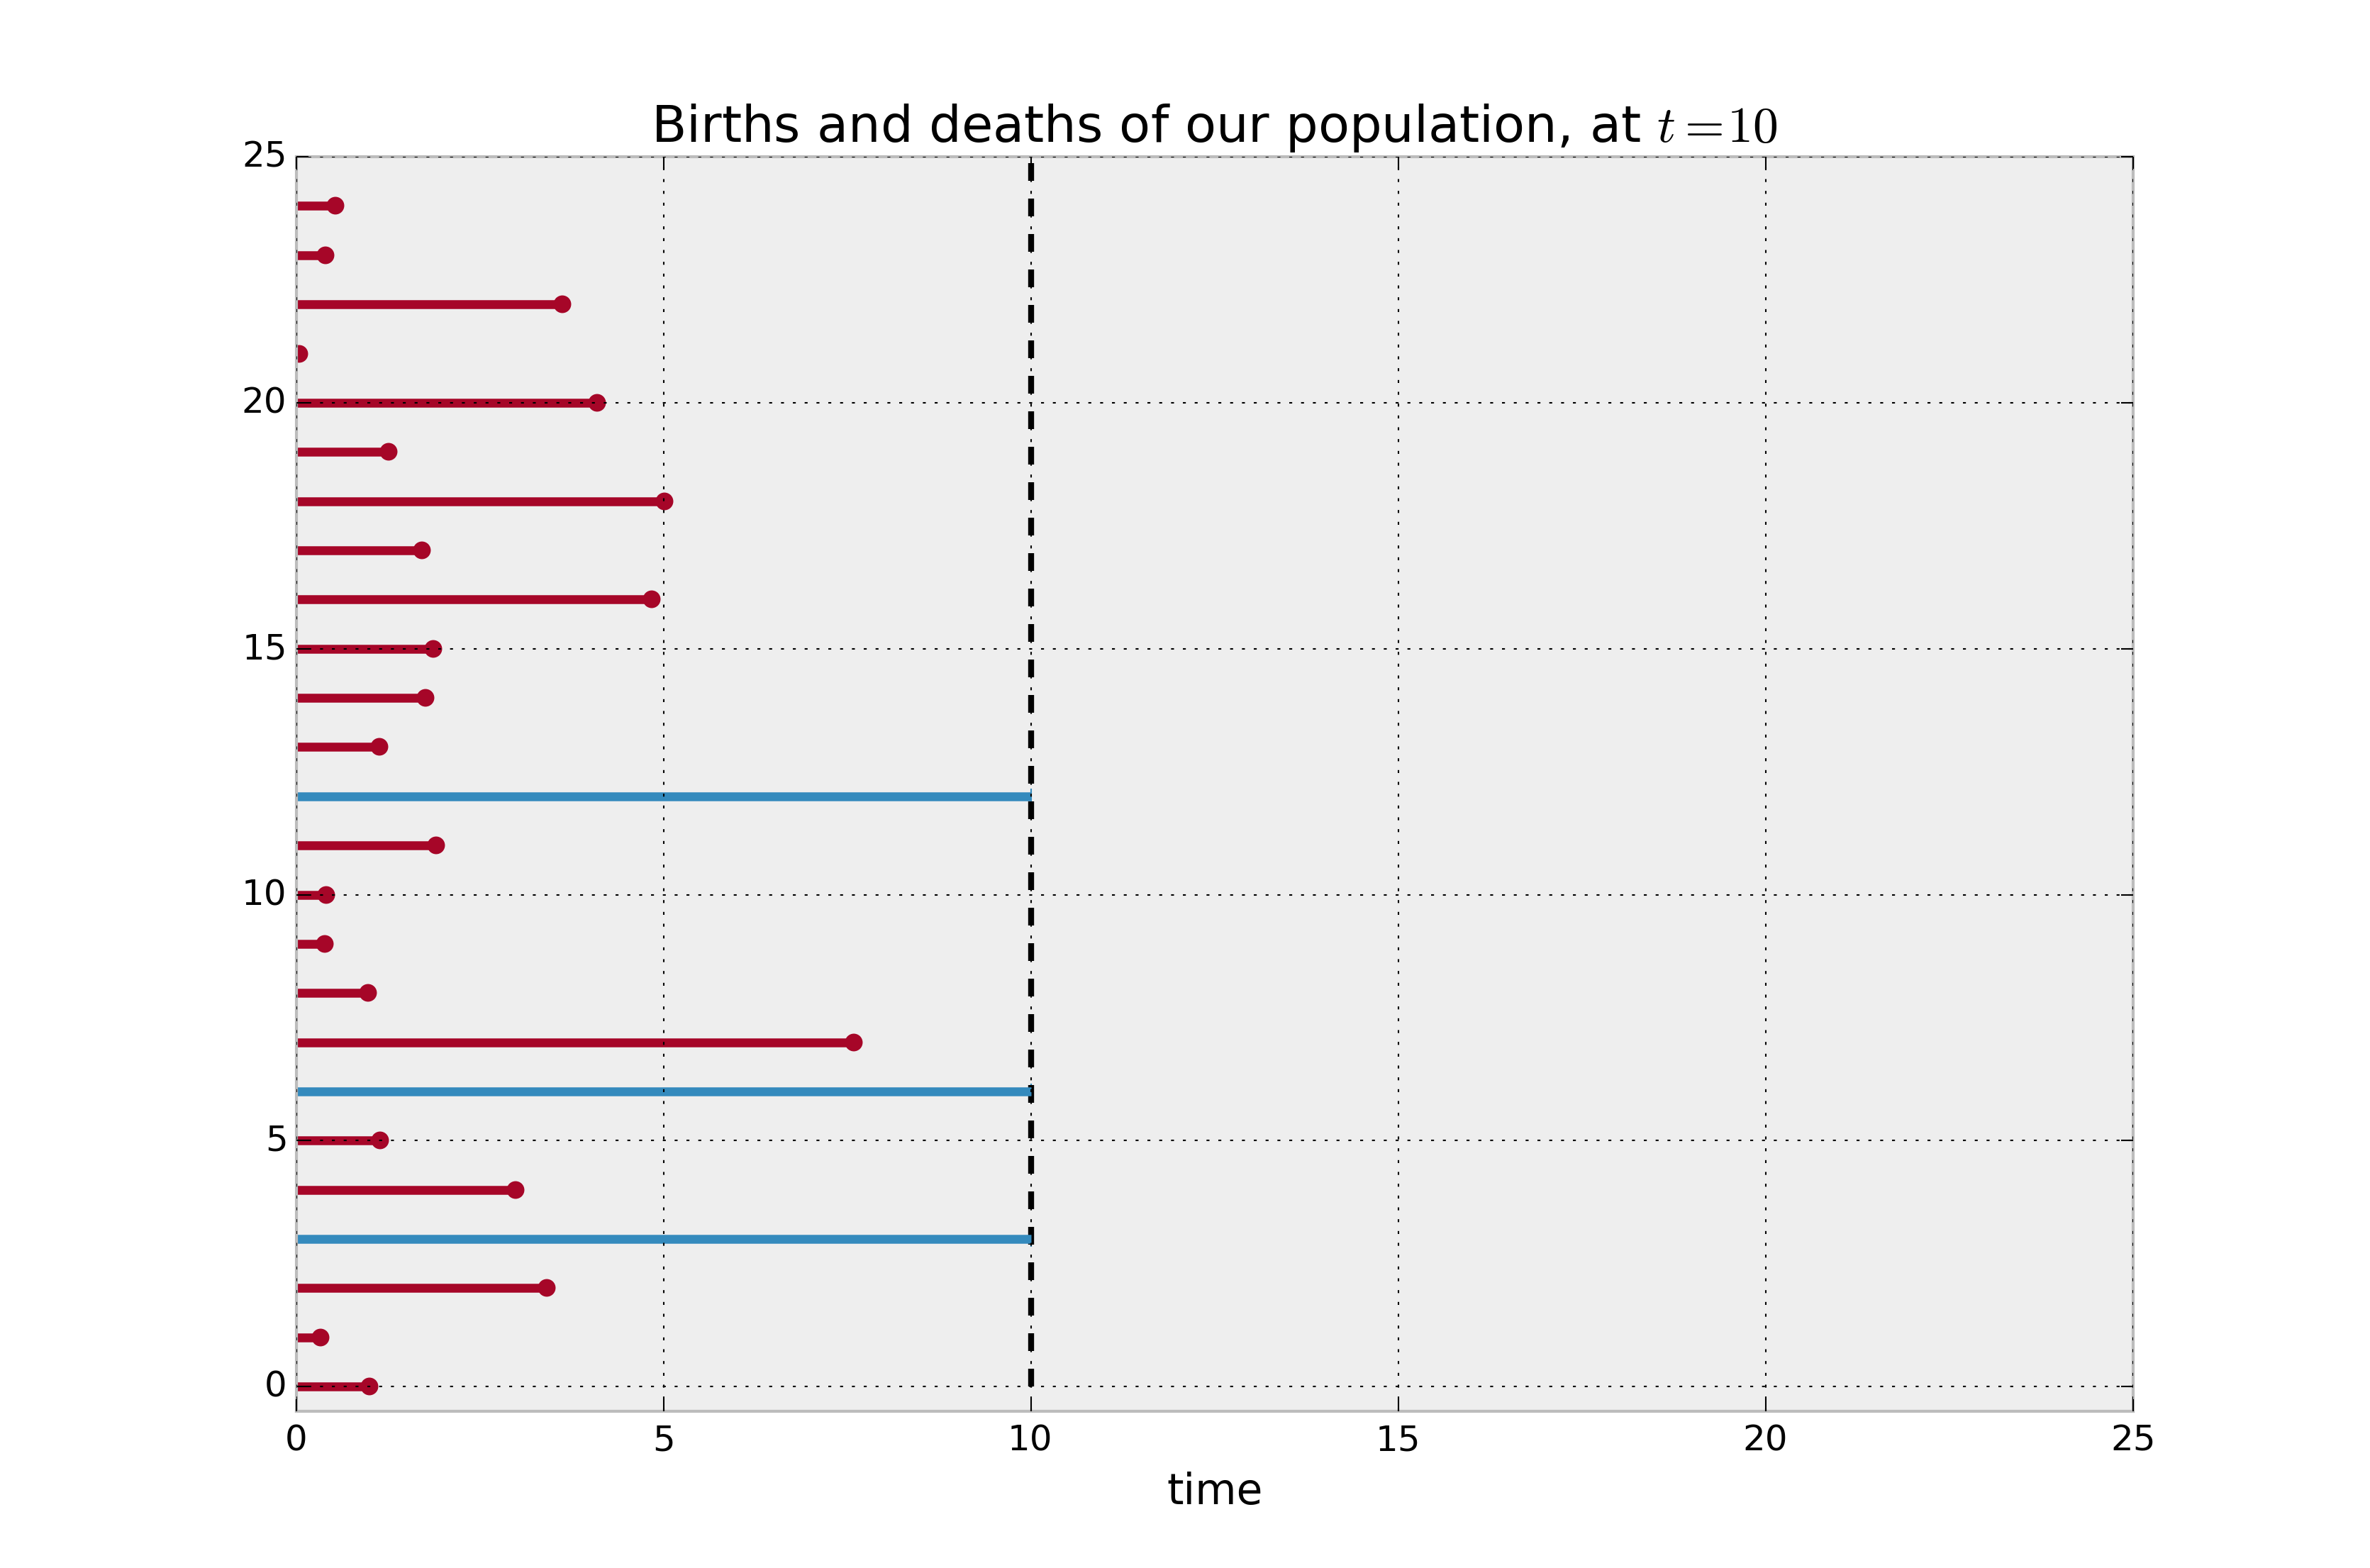

In [1]:
from IPython.display import Image

Image('images/survival_analysis_intro_censoring.png')

In the dataset used to generate this plot, the blue records have `time_event_occurred` values far past their peers, if even at all. But in construction of our Survival Analysis, we made the contextual decision to stop observations at `t=10`. This is called *right-censoring* our data and is a fundamental element of Survival Analysis.

Indeed, the functions that we'll use to approximate this behavior will all take `t` as their input.

## Key Equations

### `f, F`

For starters, we assume that `t` follows some probability distribution with pdf `f(t)`. To rephrase, the values of `t` corresponding to events occurring within this population follow a distribution `f(t)`.

Extending from this, we can say that the integral of this pdf, `F(t)` will represent the probability that an event will have occurred by time `t`. Or

$F(t) = P(T < t)$

More generally, if you look at the figure above, we might expect the value of `F(9)` to be very high, as it represents the proportion of our population that will have had an event occur by `t=9`. Eyeballing, it looks like only `3` of our `25` records are still blue by that point, thus `F(9) ~ (22/25) = .88`

### Survival Function, `S(t)`

The counterpart to `F(t)`, the proportion of our population that has had an event occur, is `S(t)`, or the proportion of the population that has *not* had an event occur. Because these methods were originally developed in the context of diagnosis and healthcare, this is known as the survival function.

Restating in terms of probability

`S(t) = Pr(T > t)`

Borrowing once more from the `lifeline` docs, we expect `S(t)` to generally look like this

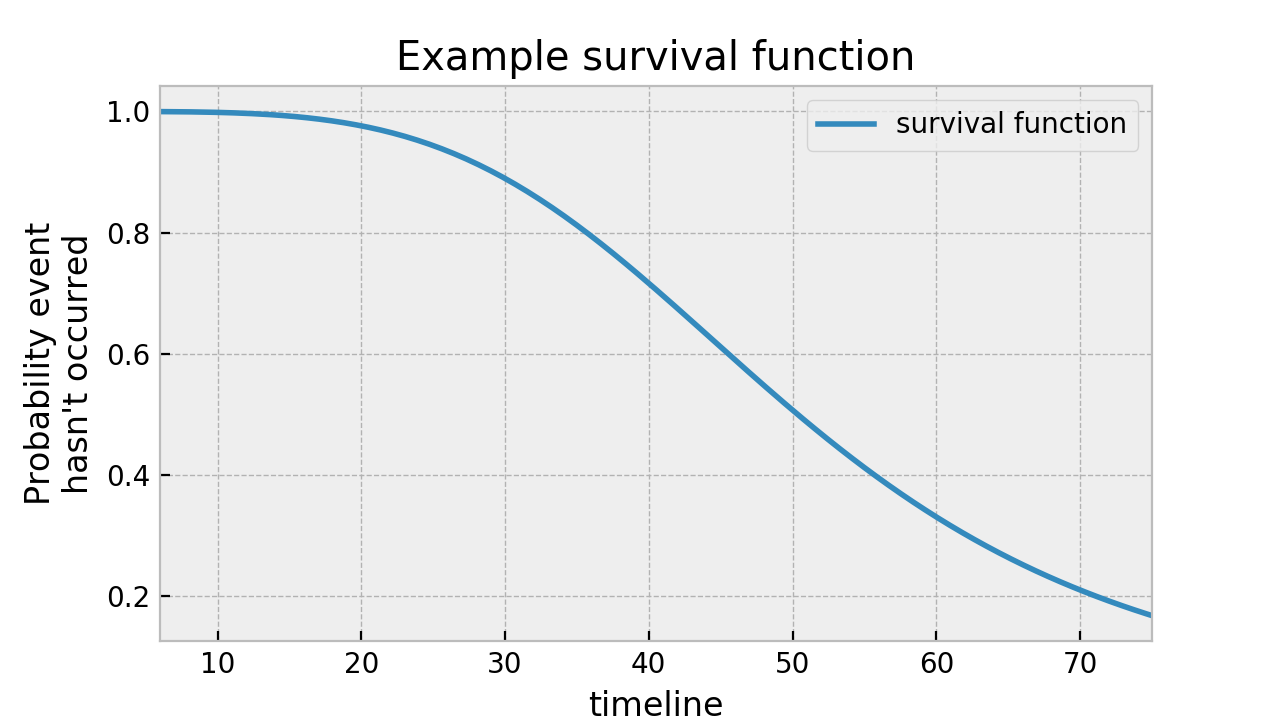

In [2]:
Image('images/intro_survival_function.png')

With particular emphasis on the fact that `S(t)` is a *monotonically-decreasing* function. No resurrection in this model :)

### Hazard Function

The last piece of this puzzle is the *hazard function*, which expresses the point-in-time risk of an event happening at time `t`, given that the population has survived that long. Or stated as a probability:

$h(t) = Pr(t < T \leq t + dt | T > t)$

We can rewrite this conditional probability as

$\frac{Pr(t < T \leq t + dt)}{\Pr(T > t)}$

And that denominator should look familiar

$\frac{Pr(t < T \leq t + dt)}{S(t)}$

Now let's break down the numerator.

$Pr(t < T \leq t + dt)$

We want to know the incremental risk between two points in time, `t, t+dt`. Sounds like a slope to me. Because `S(t)` is a strictly *decreasing* function, we'll write it in order of size.

$\frac{S(t) - S(t + dt)}{dt}$

Next we'll do a bit of substitution based on the definition of `S(t)`

$\frac{(1 - F(t)) - (1 - F(t + dt))}{dt}$

Reducing, we're conveniently left with the following, thanks to the definition of a derivative

$\frac{F(t + dt) - F(t)}{dt} = f(t)$

Putting it all together, we have

$h(t) = \frac{f(t)}{S(t)}$

## Translating

It's worth noting that that last equation can be rearranged as 

$S(t) = \exp(-H(t))$

where `H(t)` is the *cumulative hazard function*.


Picking up where we left off, we have

$h(t) = \frac{f(t)}{S(t)} = \frac{f(t)}{1 - F(t)}$

But a clever application of the chain rule gives us

$h(t) = - \frac{d}{dt} log(1 - F(t))$

converting back, moving the negative, and integrating both sides, we get

$-H(t) = log(S(t))$

finally, we exponentiate and flip left and right to get

$S(t) = \exp(-H(t))$

As stated.


From here, the author of `lifelines` geeks about how easy it is to dance around the various equations with simple translations, haha

In [3]:
Image('images/map.png')